Information data DataSet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 15 columns):
Id        15120 non-null int64
p1        12156 non-null float64
p2        12188 non-null float64
p3        12096 non-null float64
p4        12071 non-null float64
p5        12083 non-null float64
p6        12057 non-null float64
p7        12151 non-null float64
p8        12035 non-null float64
p9        12073 non-null float64
p10       12152 non-null float64
p11       12031 non-null float64
p12       12031 non-null float64
p13       12198 non-null float64
target    15120 non-null int64
dtypes: float64(13), int64(2)
memory usage: 1.7 MB
None
Statistics Information  DataSet:
                Id            p1            p2      ...                p12           p13        target
count  15120.00000  12156.000000  12188.000000      ...       12031.000000  12198.000000  15120.000000
mean    7560.50000   2746.864676    155.722432      ...           0.032250     

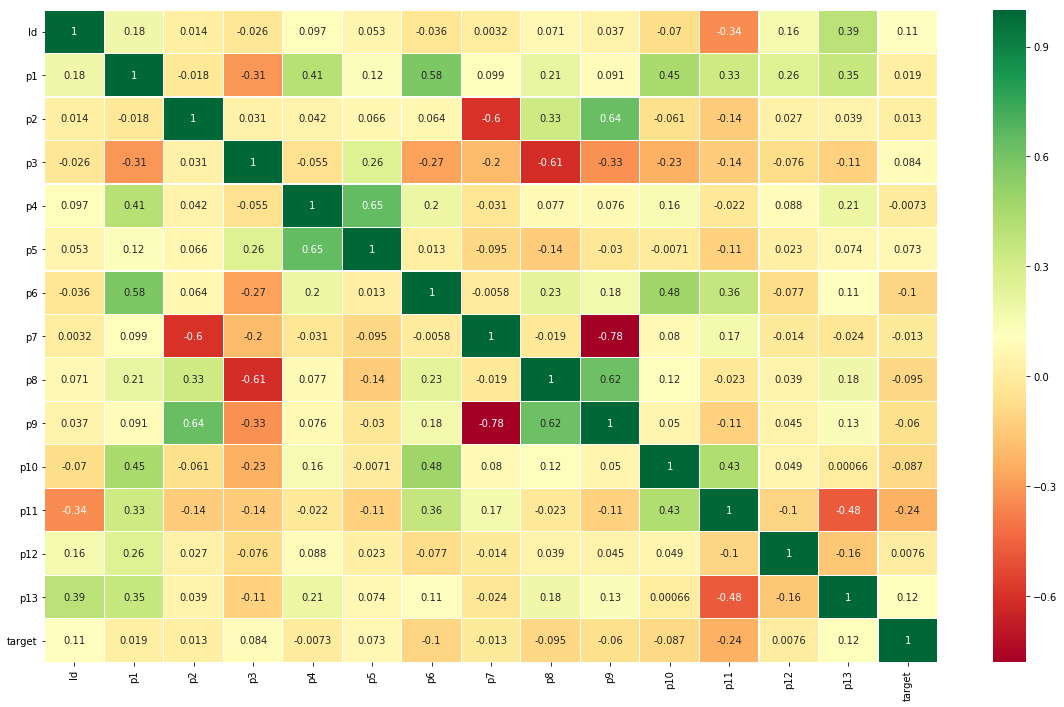

In [4]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt     
get_ipython().magic('matplotlib inline')
import seaborn as sns               
from IPython.display import display


#***************Read DataSet*************************
data=pd.read_csv('D:/Communer/train-missings.csv')
print("======================================================================================")
print("Information data DataSet:")
print("======================================================================================")
print(data.info())
print("======================================================================================")
print("Statistics Information  DataSet:")
print("======================================================================================")
print(data.describe())
print("Correlations:")
print(data.corr())
print("======================================================================================")
#****************************************

# #***************visualize correlation DataSet*************************
corrMat = data.corr()
sns.heatmap(corrMat,annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [5]:
# Fill Miss Values With KMeans , n_cluster=3

import numpy as np
from sklearn.cluster import KMeans

def kmeans_missing(X, n_clusters, max_iter=10):
    missing = ~np.isfinite(X)
    mu = np.nanmean(X, 0, keepdims=1)
    X_hat = np.where(missing, mu, X)

    for i in range(max_iter):
        if i > 0:
            cls = KMeans(n_clusters, init=prev_centroids)
        else:
            cls = KMeans(n_clusters, n_jobs=-1)

        labels = cls.fit_predict(X_hat)
        centroids = cls.cluster_centers_

        X_hat[missing] = centroids[labels][missing]

        if i > 0 and np.all(labels == prev_labels):
            break

        prev_labels = labels
        prev_centroids = cls.cluster_centers_

    return labels, centroids, X_hat
labels, centroids, X_hat = kmeans_missing(data, n_clusters=3)

data=pd.DataFrame(X_hat)
data.head()
data.columns

RangeIndex(start=0, stop=15, step=1)

In [6]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix 
all_features = data.drop([0,14],axis=1)
Targeted_feature = data[14]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((10584, 13), (4536, 13), (10584,), (4536,))

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 71.63
The cross validated score for Random Forest Classifier is: 64.02


Text(0.5,1.05,'Confusion_matrix')

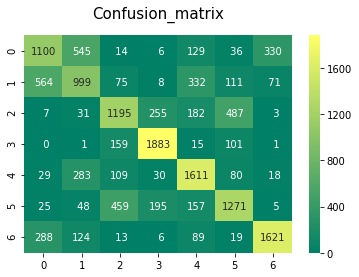

In [7]:
# Create a model with Random Forests

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
prediction_rm=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(prediction_rm,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_rm=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest Classifier is:',round(result_rm.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the K Nearst Neighbors Classifier is 59.35
The cross validated score for K Nearest Neighbors Classifier is: 51.62


Text(0.5,1.05,'Confusion_matrix')

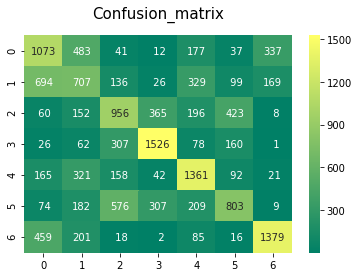

In [8]:
# Create a model with KNN

from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the K Nearst Neighbors Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_knn=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for K Nearest Neighbors Classifier is:',round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

--------------The Accuracy of the model----------------------------
The accuracy of the Gradient Boosting Classifier is 67.31
The cross validated score for AdaBoostClassifier is: 61.77


Text(0.5,1.05,'Confusion_matrix')

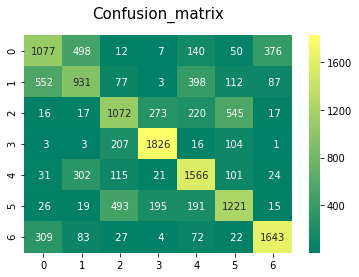

In [9]:
# Create a model with GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc,y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
result_gbc=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoostClassifier is:',round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)